# U.S. Medical Insurance Costs

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
data = pd.read_csv("/home/cacaprog/learning-projects/us-medical-insurance-cost/insurance.csv")

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
# Investigate the costs for men and women

female_costs = data.charges[data.sex == 'female']
male_costs = data.charges[data.sex == 'male']
fem_costs_mean = np.mean(female_costs)
male_costs_mean = np.mean(male_costs)

print('The costs mean for men: $', np.round(male_costs_mean))
print('The costs mean for women: $', np.round(fem_costs_mean))
print('Female insurance costs are $', np.round(fem_costs_mean - male_costs_mean), 'cheapter than man\'s costs')

The costs mean for men: $ 13957.0
The costs mean for women: $ 12570.0
Female insurance costs are $ -1387.0 cheapter than man's costs


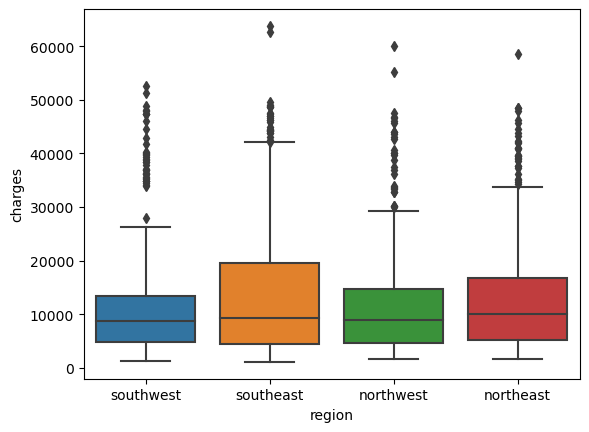

In [41]:
# Investigate the costs per region for smokers and no smokers
regions_smoker = data.region[data.smoker == 'yes']
regions_no_smoker = data.region[data.smoker == 'no']

sns.boxplot(data = data, x = 'region', y = 'charges')
plt.show()

southeast have the most expensive insurance cost
southwest have the most cheaper insurance cost

the mean for all the regions are aproximately $ 10.000